In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

protocol.draw()

░      ┌───┐ ░    ┌─┐ ░                                     »
  Q: ───────────░───■──┤ H ├─░────┤M├─░─────────────────────────────────────»
     ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░                                     »
  A: ┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─────────────────────────────────────»
     └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ ┌────── ┌───┐ ───────┐ ┌────── ┌───┐»
  B: ─────┤ X ├─░────────────░──╫──╫──░─┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├»
          └───┘ ░            ░  ║  ║  ░ └──╥─── └───┘ ───────┘ └──╥─── └───┘»
                                ║  ║    ┌──╨──┐                   ║         »
a: 1/═══════════════════════════╩══╬════╡ 0x1 ╞═══════════════════╬═════════»
                                0  ║    └─────┘                ┌──╨──┐      »
b: 1/══════════════════════════════╩═══════════════════════════╡ 0x1 ╞══════»
                                   0                           └─────┘      »
«               
«  Q: ──────────
«               
«  A: ──────────
«      ───────┐ 
«  B:   End-0 ├─
«      ───────┘ 
«a: 1/══════════
«               
«b: 1/══════════
«

In [2]:
from qiskit.circuit.library import UGate
from numpy import pi, random

random_gate = UGate(
    theta = random.random()*2*pi,
    phi  = random.random()*2*pi,
    lam = random.random()*2*pi
)

display(random_gate.to_matrix())

array([[-0.62262573+0.j        ,  0.77239994-0.12544139j],
       [ 0.58687203+0.51760837j,  0.52693675+0.33166317j]])

In [3]:
#New circuit using the same bits and qubits used in teleportation protocol

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

#Starting with randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

#Append the teleportation from above code
test = test.compose(protocol)
test.barrier()

#Apply inverse of random unit to B and measure
test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

test.draw()

┌──────────────────────────┐ ░            ░      ┌───┐ ░    ┌─┐ ░ »
       Q: ┤ U(4.4858,0.72277,2.9806) ├─░────────────░───■──┤ H ├─░────┤M├─░─»
          └──────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░ »
       A: ─────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─»
                                       ░ └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ »
       B: ─────────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─»
                                       ░      └───┘ ░            ░  ║  ║  ░ »
     a: 1/══════════════════════════════════════════════════════════╩══╬════»
                                                                    0  ║    »
     b: 1/═════════════════════════════════════════════════════════════╩════»
                                                                       0    »
Result: 1/══════════════════════════════════════════════════════════════════»
                                                                            »
«                                                         ░ »
«       Q: ───────────────────────────────────────────────░─»
«                                                         ░ »
«       A: ───────────────────────────────────────────────░─»
«          ┌────── ┌───┐ ───────┐ ┌────── ┌───┐ ───────┐  ░ »
«       B: ┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├  End-0 ├──░─»
«          └──╥─── └───┘ ───────┘ └──╥─── └───┘ ───────┘  ░ »
«          ┌──╨──┐                   ║                      »
«     a: 1/╡ 0x1 ╞═══════════════════╬══════════════════════»
«          └─────┘                ┌──╨──┐                   »
«     b: 1/═══════════════════════╡ 0x1 ╞═══════════════════»
«                                 └─────┘                   »
«Result: 1/═════════════════════════════════════════════════»
«                                                           »
«                                            
«       Q: ──────────────────────────────────
«                                            
«       A: ──────────────────────────────────
«          ┌─────────────────────────────┐┌─┐
«       B: ┤ U(-4.4858,-2.9806,-0.72277) ├┤M├
«          └─────────────────────────────┘└╥┘
«     a: 1/════════════════════════════════╬═
«                                          ║ 
«     b: 1/════════════════════════════════╬═
«                                          ║ 
«Result: 1/════════════════════════════════╩═
«                                          0

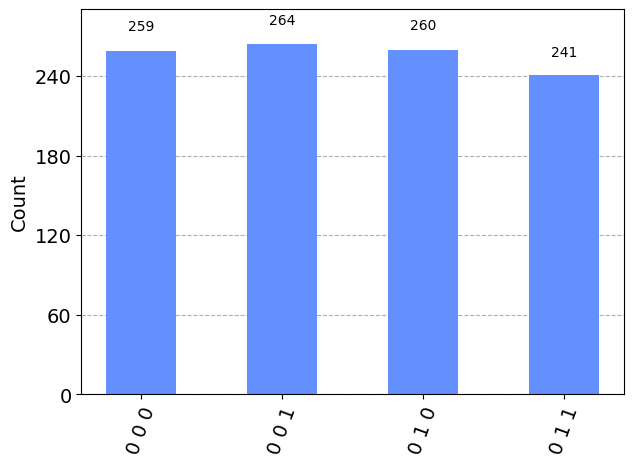

In [4]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

result = AerSimulator().run(test).result()
statistics = result.get_counts()
plot_histogram(statistics)

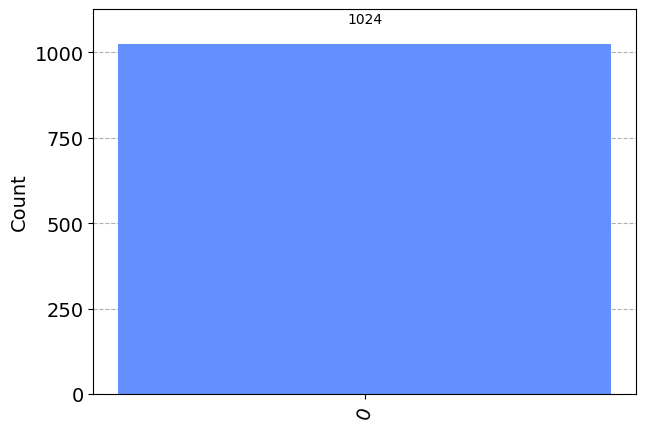

In [5]:
from qiskit.result import marginal_distribution

filtered_statistics = marginal_distribution(statistics, [2])
plot_histogram(filtered_statistics)